# Loan Default Prediction

### Overview

The objective of this project is to predict loan defaults using data from LendingClub, an online loan marketplace. By identifying the factors leading to loan defaults, the company can reduce credit losses and enhance their risk assessment strategies.

The dataset consists of various features related to loan applications, including loan amount, interest rate, loan status, and borrower characteristics. The primary objective is to understand the driving factors behind loan default and utilize this knowledge for risk assessment.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/lending-club-loan-fix.csv'
loan = pd.read_csv(file_path)

## Data Loading and Cleaning

The first step involves exploring and understanding the dataset:
* **Loading Data:** The dataset is loaded from a CSV file using pandas.
* **Initial Data Exploration:** We explore the first few rows, data types, and basic statistics to understand the structure and content of the data.
* **Data Cleaning:**
    * Dropped irrelevant columns (emp_title and address).
    * Checked for and handled missing values by dropping rows with missing data.
    * Removed duplicate records.
    * Identified unique values in each column to ensure data consistency.

In [2]:
# Display the first few rows of the dataframe
print(loan.head())

   loan_amnt        term  int_rate  installment grade sub_grade  \
0     8000.0   36 months     16.20       282.05     C        C4   
1     9000.0   36 months     14.33       309.05     C        C1   
2    12000.0   60 months     12.49       269.92     B        B5   
3    20000.0   36 months      6.62       614.08     A        A2   
4    13600.0   36 months      7.29       421.74     A        A4   

             emp_title emp_length home_ownership  annual_inc  ... open_acc  \
0            Counselor    7 years           RENT     50000.0  ...     13.0   
1  American Portfolios    4 years           RENT     40000.0  ...     13.0   
2       Senior Analyst    4 years       MORTGAGE     73000.0  ...     11.0   
3           QA Manager    9 years       MORTGAGE    110000.0  ...      8.0   
4    Caxton Associates    7 years       MORTGAGE    115000.0  ...      9.0   

  pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     1.0    9034.0       68.4      30.0                    w  

In [3]:
# Display the basic information about the dataframe
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79206 entries, 0 to 79205
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             79206 non-null  float64
 1   term                  79206 non-null  object 
 2   int_rate              79206 non-null  float64
 3   installment           79206 non-null  float64
 4   grade                 79206 non-null  object 
 5   sub_grade             79206 non-null  object 
 6   emp_title             74679 non-null  object 
 7   emp_length            75542 non-null  object 
 8   home_ownership        79206 non-null  object 
 9   annual_inc            79206 non-null  float64
 10  verification_status   79206 non-null  object 
 11  issue_d               79206 non-null  object 
 12  loan_status           79206 non-null  object 
 13  purpose               79206 non-null  object 
 14  title                 78852 non-null  object 
 15  dti                

In [4]:
# Display the summary statistics of the dataframe
print(loan.describe())

          loan_amnt      int_rate   installment    annual_inc           dti  \
count  79206.000000  79206.000000  79206.000000  7.920600e+04  79206.000000   
mean   14090.385198     13.639490    431.035773  7.399969e+04     17.408581   
std     8343.716293      4.461456    249.793983  5.718671e+04      8.119132   
min      500.000000      5.320000     16.080000  4.200000e+03      0.000000   
25%     8000.000000     10.490000    250.290000  4.500000e+04     11.340000   
50%    12000.000000     13.330000    374.970000  6.400000e+04     16.980000   
75%    20000.000000     16.490000    566.560000  9.000000e+04     23.010000   
max    40000.000000     30.990000   1428.700000  5.000000e+06     93.860000   

           open_acc       pub_rec     revol_bal    revol_util     total_acc  \
count  79206.000000  79206.000000  7.920600e+04  79147.000000  79206.000000   
mean      11.340075      0.174734  1.588698e+04     53.938152     25.458867   
std        5.137967      0.504655  2.076770e+04    

In [5]:
# Display the data types of each column
print(loan.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


In [6]:
# Drop the "emp_title" and "address" columns
loan = loan.drop(columns=['emp_title', 'address'])

In [7]:
# Display the unique values in the target column to understand its distribution
print(loan['loan_status'].unique())

['Fully Paid' 'Charged Off']


In [8]:
# Display the count of each unique value in the target column
print(loan['loan_status'].value_counts())

loan_status
Fully Paid     63556
Charged Off    15650
Name: count, dtype: int64


In [9]:
# Check for missing values
print(loan.isnull().sum())

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              3664
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    354
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                59
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                7573
pub_rec_bankruptcies      97
dtype: int64


In [10]:
# Dropping rows with missing values
loan = loan.dropna()

In [11]:
# Check for duplicate records
print(loan.duplicated().sum())

0


In [12]:
for column in loan.columns:
    unique_values = loan[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}\n")

Column: loan_amnt
Unique values: [ 8000.  9000. 12000. ... 30175. 34600. 27950.]

Column: term
Unique values: [' 36 months' ' 60 months']

Column: int_rate
Unique values: [16.2  14.33 12.49  6.62 10.64 17.27 15.1  14.65  9.99 17.77 19.05 13.53
 22.99 25.8  12.69 12.12 10.16 18.49  9.17 18.75 17.57 15.31 16.29 12.88
  6.24  7.89 13.11 10.99 20.99 15.61 17.14 19.52 11.53 17.86 20.49 14.98
 21.18 11.14  5.32  8.9  13.99 18.25 13.33 16.99  7.9  13.98 11.99 20.31
 12.99 18.85 15.59 19.2  12.39 14.99 14.09 14.31 16.55 10.15 22.4  18.92
 17.76 18.24  7.99  8.38 24.5  17.56 15.8  15.99 16.24  8.39 19.99 15.88
 14.16 17.99 18.55 13.67 20.75  8.18  6.03 13.49 24.24 11.67  7.62 20.5
 23.83  8.67 12.35 14.3  11.39  9.25 19.19 21.   22.39 10.74  8.24  8.6
 27.34 17.1  20.2  17.97 22.15  9.71 21.98 16.49  6.68 14.47 21.99  9.49
 12.29 14.49 16.78 12.59 11.49  8.19 23.13 24.08  7.49 10.75  6.89 16.59
 13.35 26.77 23.43 12.85 23.99 13.05 10.49 11.44  7.69  6.49  8.49 18.99
 11.47  6.92 11.48 13.66 13.

In [13]:
num_columns = len(loan.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 25


In [14]:
# Print column names which have "object" dtype
object_columns = loan.select_dtypes(include=['object']).columns
print("Columns with 'object' dtype:")
for column in object_columns:
    print(column)

Columns with 'object' dtype:
term
grade
sub_grade
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
earliest_cr_line
initial_list_status
application_type


## Exploratory Data Analysis (EDA)

**Univariate Analysis:** Analyzed the distribution of the target variable (loan_status) using a count plot.

**Bivariate Analysis:**
* Visualized the relationship between loan amount and loan status using a box plot.
* Examined the relationship between loan grade and loan status using a count plot.

**Multivariate Analysis:**
* Dropped non-numeric columns and created a correlation heatmap for numeric features.
* Used pairplots to visualize relationships between selected features and the target variable.

**Categorical Feature Analysis:** Visualized the relationship between categorical features (home ownership, verification status) and loan status using count plots with added grid and black borders.

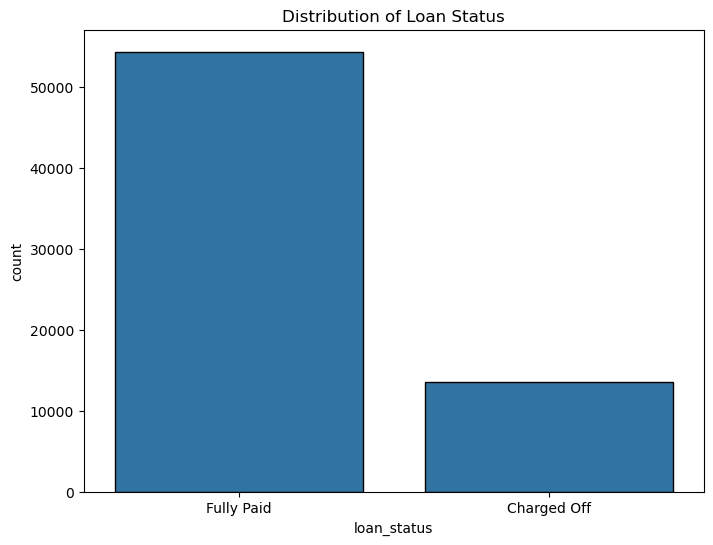

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis on the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data=loan, x='loan_status', edgecolor='black')
plt.title('Distribution of Loan Status')
plt.show()

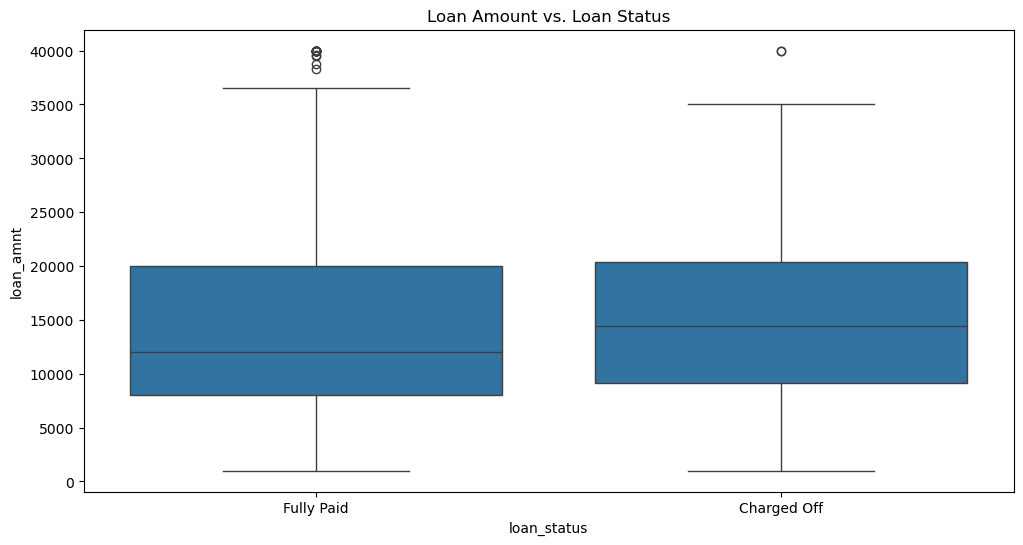

In [16]:
# Bivariate Analysis
# Relationship between loan amount and loan status
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan, x='loan_status', y='loan_amnt')
plt.title('Loan Amount vs. Loan Status')
plt.show()

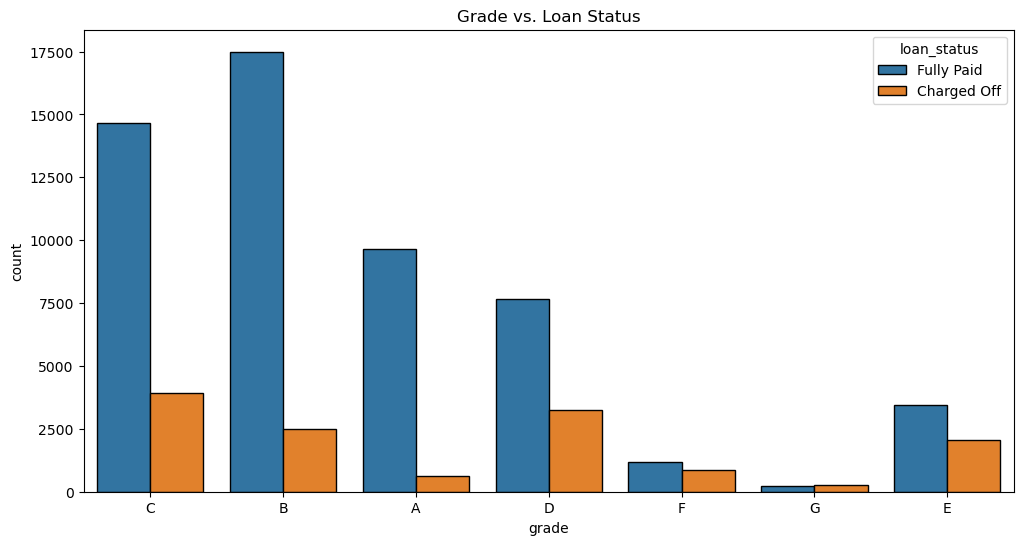

In [17]:
# Relationship between grade and loan status
plt.figure(figsize=(12, 6))
sns.countplot(data=loan, x='grade', hue='loan_status', edgecolor='black')
plt.title('Grade vs. Loan Status')
plt.show()

Non-numeric columns: Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')


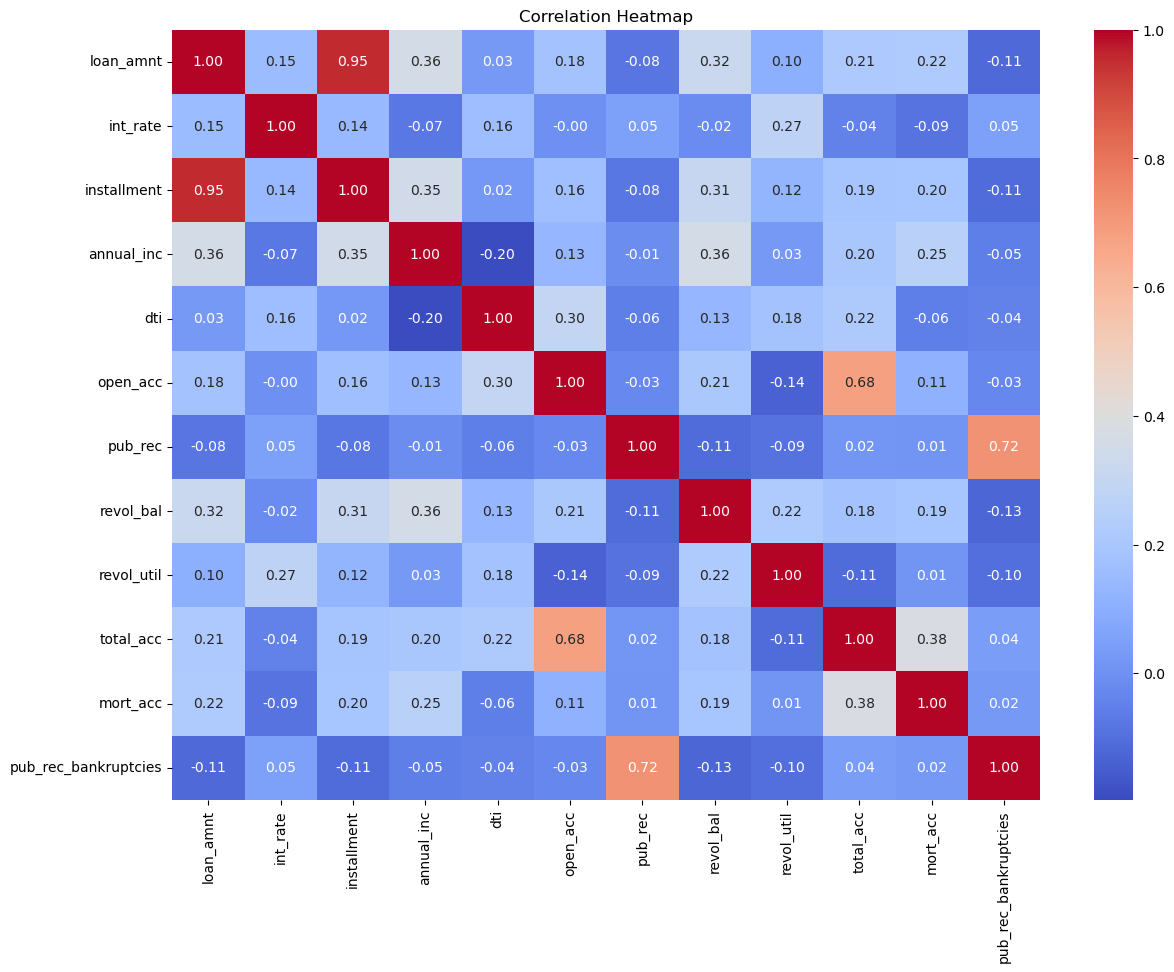

In [18]:
# Identify non-numeric columns
non_numeric_columns = loan.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Create a copy of the DataFrame
loan_numeric = loan.copy()

# Drop non-numeric columns from the copy
loan_numeric = loan_numeric.drop(columns=non_numeric_columns)

# Calculate the correlation matrix for numeric columns only
plt.figure(figsize=(14, 10))
sns.heatmap(loan_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

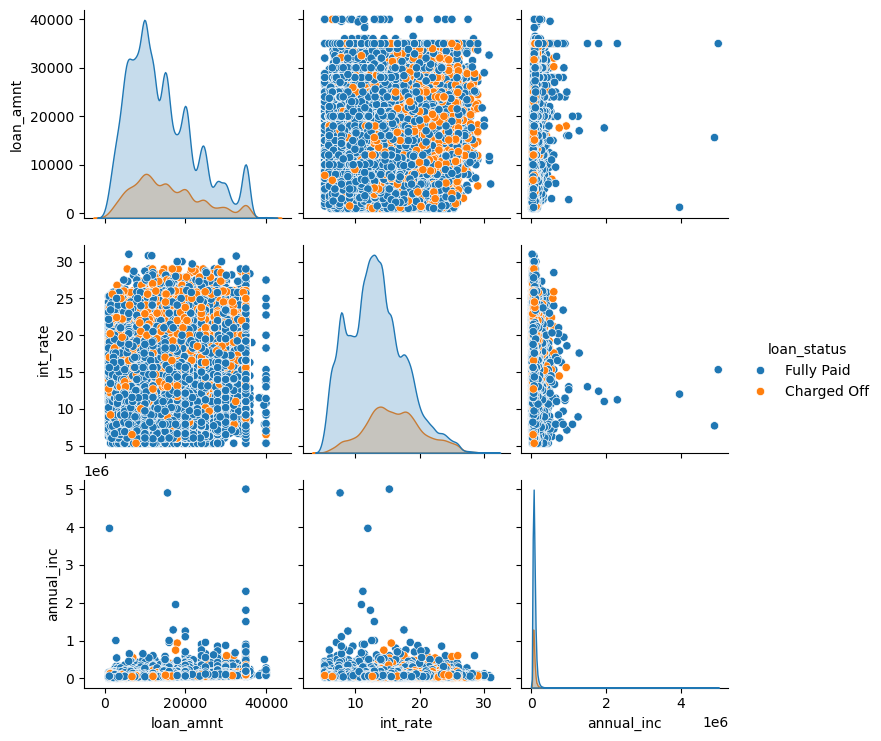

In [19]:
# Pairplot for selected features
selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'loan_status']
sns.pairplot(loan[selected_features], hue='loan_status', diag_kind='kde')
plt.show()

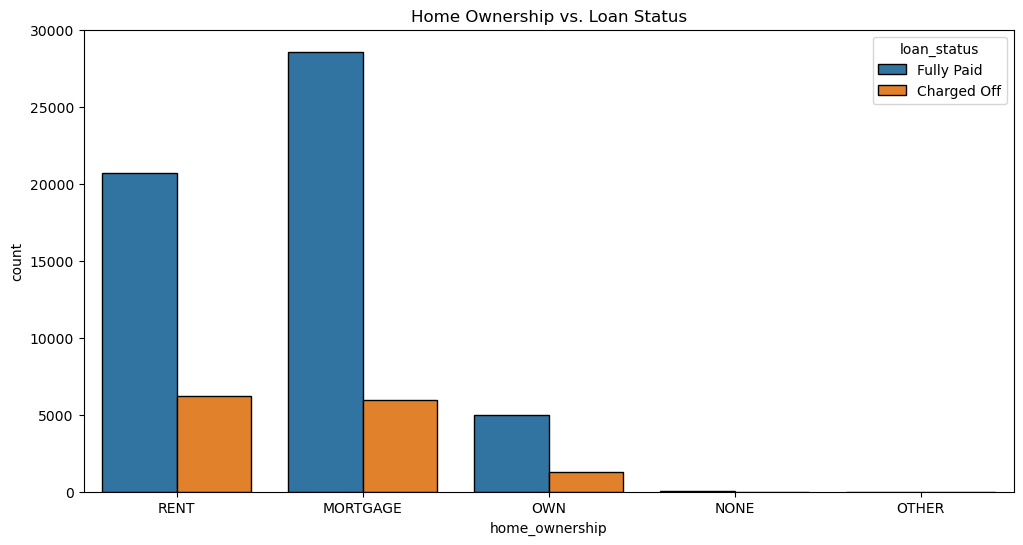

In [20]:
# Visualize Categorical Features
# Home ownership vs. loan status
plt.figure(figsize=(12, 6))
sns.countplot(data=loan, x='home_ownership', hue='loan_status', edgecolor='black')
plt.title('Home Ownership vs. Loan Status')
plt.show()

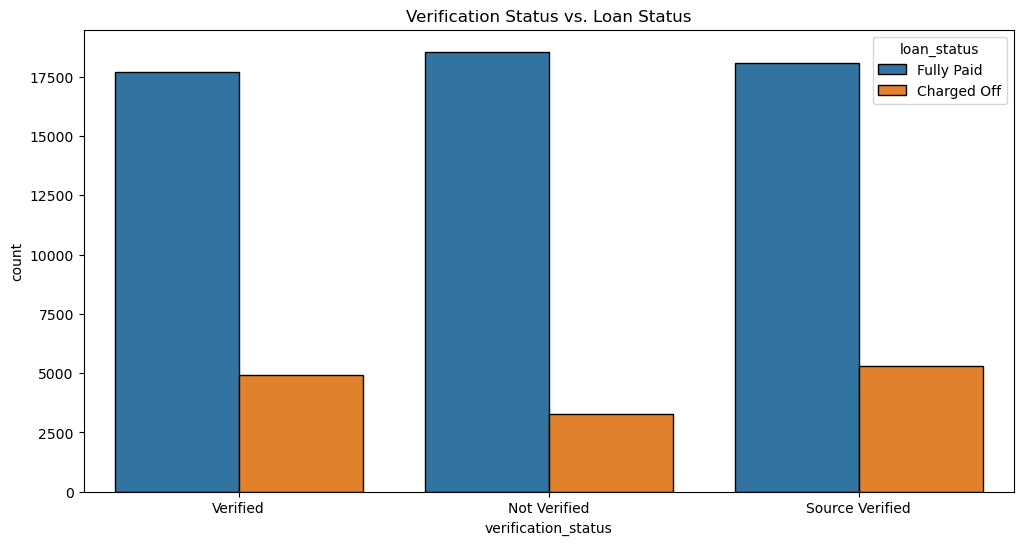

In [21]:
# Verification status vs. loan status with grid and black borders around bars
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=loan, x='verification_status', hue='loan_status', edgecolor='black')
plt.title('Verification Status vs. Loan Status')

# Add black border around the bars
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

plt.show()

## Feature Engineering and Encoding

* **One-Hot Encoding:** Applied to categorical variables with a small number of categories to convert them into numerical format.

* **Label Encoding:** Applied to categorical variables with many unique values to convert them into numerical format.

In [22]:
# One-Hot Encoding for categorical variables with small number of categories
one_hot_columns = [
    'term',
    'grade',
    'sub_grade',
    'home_ownership',
    'verification_status',
    'loan_status',
    'purpose',
    'initial_list_status',
    'application_type'
]

loan = pd.get_dummies(loan, columns=one_hot_columns)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables with many unique values
label_encode_columns = [
    'emp_length',
    'issue_d',
    'title',
    'earliest_cr_line'
]

label_encoder = LabelEncoder()
for column in label_encode_columns:
    loan[column] = label_encoder.fit_transform(loan[column])

## Feature Selection and Model Building

**SelectKBest:** Used to select the top features based on their correlation with the target variable.

**Model Training:**
* Split the data into training and testing sets.
* Trained a Random Forest model using the selected features.
* Evaluated the model's performance using accuracy, confusion matrix, and classification report.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Identify encoded columns for loan_status
loan_status_columns = [col for col in loan.columns if 'loan_status' in col]

# Assume 'loan_status' encoded columns are present
X = loan.drop(columns=loan_status_columns)
y = loan[loan_status_columns]

# Sum encoded columns to create a single target variable
y = y.idxmax(axis=1).apply(lambda x: x.split('_')[-1])

# Apply SelectKBest to extract the top features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame(fit.scores_, index=X.columns, columns=['Score'])
print(feature_scores.nlargest(10, 'Score'))

                                        Score
int_rate                          4370.507638
term_ 36 months                   2276.467163
term_ 60 months                   2276.467163
grade_A                           1450.033848
dti                               1227.968532
grade_E                           1152.759621
grade_B                            999.011987
grade_D                            794.080798
grade_F                            692.448373
verification_status_Not Verified   490.259896


In [25]:
# List of selected features
selected_features = [
    'int_rate',
    'term_ 36 months',
    'term_ 60 months',
    'grade_A',
    'dti',
    'grade_E',
    'grade_B',
    'grade_D',
    'grade_F',
    'verification_status_Not Verified'
]

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Verify the new DataFrame
print(X_selected.head())

   int_rate  term_ 36 months  term_ 60 months  grade_A    dti  grade_E  \
0     16.20             True            False    False  17.64    False   
1     14.33             True            False    False  15.87    False   
2     12.49            False             True    False  28.63    False   
3      6.62             True            False     True  15.45    False   
5     10.64             True            False    False  15.47    False   

   grade_B  grade_D  grade_F  verification_status_Not Verified  
0    False    False    False                             False  
1    False    False    False                              True  
2     True    False    False                              True  
3    False    False    False                             False  
5     True    False    False                             False  


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7326061320754716
Confusion Matrix:
 [[ 625 2034]
 [1594 9315]]
Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.28      0.24      0.26      2659
  Fully Paid       0.82      0.85      0.84     10909

    accuracy                           0.73     13568
   macro avg       0.55      0.54      0.55     13568
weighted avg       0.72      0.73      0.72     13568



## Hyperparameter Tuning

* Grid Search: Performed hyperparameter tuning to find the best parameters for the Random Forest model.

* Cross-Validation: Ensured the model's robustness by performing cross-validation and calculating the mean cross-validation score.


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.8020342  0.80262382 0.80107606 0.80114976 0.80173939]
Mean CV Score: 0.801724646226415


## Save The Best Model

**Model Serialization:** Saved the best model to a file using pickle for future use or deployment.

In [29]:
import pickle

# Save the best model to a file
with open('load-default-prediction-model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

## Summary

This project involved loading and cleaning loan data, performing exploratory data analysis, encoding categorical features, selecting important features, building and tuning a Random Forest model, and finally saving the best model. The steps taken ensure that the model is well-prepared for predicting loan defaults, helping LendingClub reduce credit losses and improve their lending decisions.